In [1]:
# Description : This program predicts employee attrition

In [2]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import gradio as gr

In [3]:
df=pd.read_csv("employeeAttrition.csv")

In [4]:
# Printing the first 10 rows of data

df.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [5]:
# Printing the last 10 rows of data

df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [6]:
#checking for null values

df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# checking the maximum,minimum ,mean values............

description=df.describe(include='all')
print(description)

                Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Developm

In [8]:
df['Attrition'].value_counts()

# the no option shows the number of employees still working while the yes option shows the numbrer of employees left the company

Attrition
No     1233
Yes     237
Name: count, dtype: int64

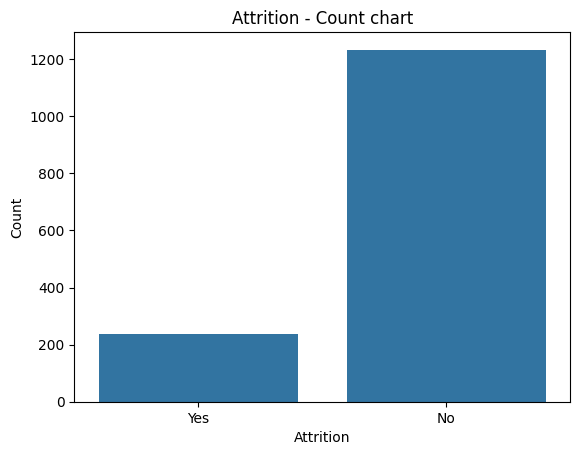

In [9]:
# visualization of the above data 

sns.countplot(x='Attrition',data=df)
plt.title("Attrition - Count chart")
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

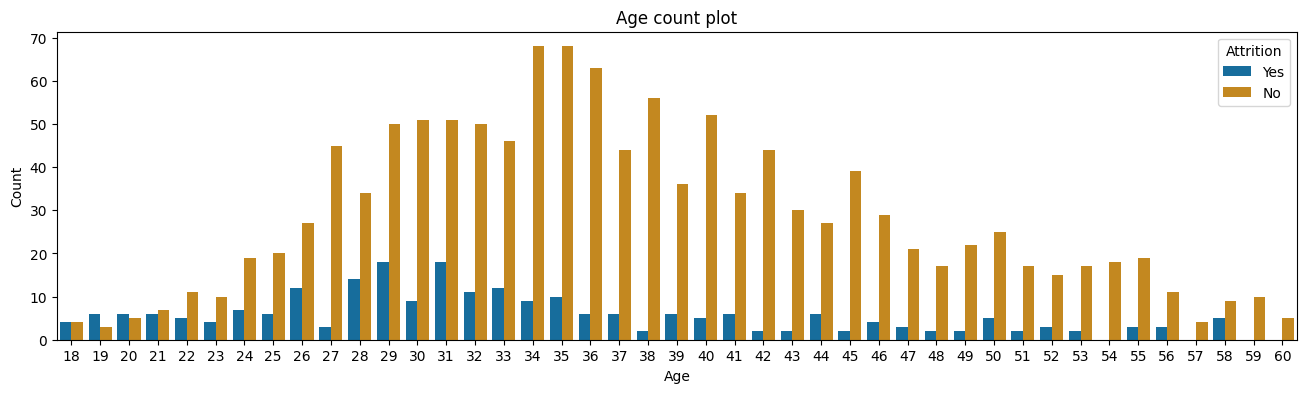

In [10]:
# number of employees that left annd stayed in terms of age

plt.subplots(figsize=(16,4))
sns.countplot(x='Age',hue='Attrition',data=df, palette='colorblind')
plt.title("Age count plot")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [11]:
# printing all data types with their unique values

for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + " : " + str(df[column].unique()))
        print(df[column].value_counts())
        print("________________________________________________________________________________________")
        

Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
________________________________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
________________________________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
________________________________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: 

In [12]:
# Removing single valued columns or useless column

df=df.drop('Over18',axis=1)
df=df.drop('EmployeeNumber',axis=1)
df=df.drop('StandardHours',axis=1)
df=df.drop('EmployeeCount',axis=1)

In [13]:
# Getting the correlation 
print("Correlation between different parameters:")
df.corr(numeric_only=True)

Correlation between different parameters:


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


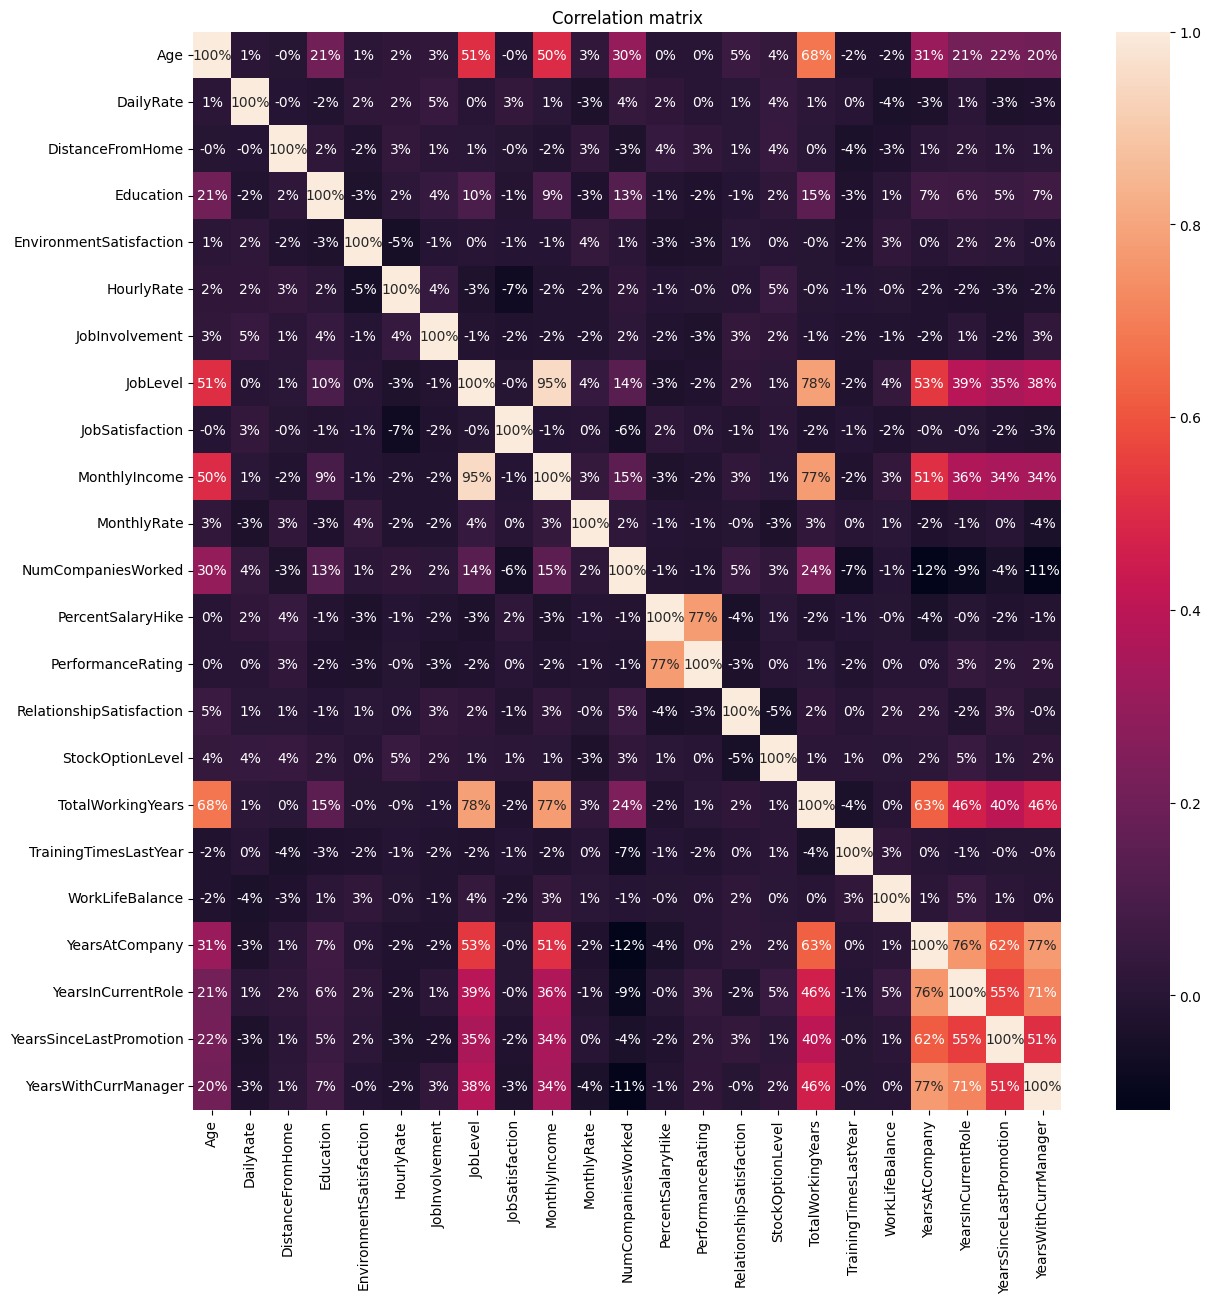

In [14]:
# visualization the correlation

plt.figure(figsize=(14,14))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.0%')
plt.title("Correlation matrix")
plt.show()

In [15]:
# Transform the data
# Transfor the string values to numerical values


# Assuming 'df' is your pandas DataFrame
for column in df.columns:
    # Check if the column is NOT numeric
    if not pd.api.types.is_numeric_dtype(df[column]):
        # Apply LabelEncoder to non-numeric columns
        df[column] = LabelEncoder().fit_transform(df[column])

In [16]:
# Creating a new column

df['Age_Years']= df['Age']

In [17]:
# dropping age column

df=df.drop('Age',axis=1)

In [18]:
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,1102,2,1,2,1,2,0,94,...,1,0,8,0,1,6,4,0,5,41
1,0,1,279,1,8,1,1,3,1,61,...,4,1,10,3,3,10,7,1,7,49
2,1,2,1373,1,2,2,4,4,1,92,...,2,0,7,3,3,0,0,0,0,37
3,0,1,1392,1,3,4,1,4,0,56,...,3,0,8,3,3,8,7,3,0,33
4,0,2,591,1,2,1,3,1,1,40,...,4,1,6,3,3,2,2,2,2,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,884,1,23,2,3,3,1,41,...,3,1,17,3,3,5,2,0,3,36
1466,0,2,613,1,6,1,3,4,1,42,...,1,1,9,5,3,7,7,1,7,39
1467,0,2,155,1,4,3,1,2,1,87,...,2,1,6,0,3,6,2,0,3,27
1468,0,1,1023,2,2,3,3,4,1,63,...,4,0,17,3,2,9,6,0,8,49


In [19]:
pd.set_option('display.max_columns', None)
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,41
1,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,49
2,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,37
3,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,33
4,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,27


In [20]:
# split the data

X=df.iloc[:, 1:df.shape[1]].values
Y=df.iloc[:, 0].values

In [21]:
# Splitting the data into training annd testing data

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.25, random_state=0)

In [22]:
# Using Random Forest Classifier

forest=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [23]:
# checking accuracy
print("Checking accuracy of the model using training data:")
forest.score(X_train, Y_train)

Checking accuracy of the model using training data:


0.9791288566243194

In [24]:
input_data=(2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,41)
#changing the input data in numpy array
input_data_as_nparray=np.asarray(input_data)
#reshaping the data as we are predecting for only one value
input_data_reshape=input_data_as_nparray.reshape(1,-1)

predection=forest.predict(input_data_reshape)
print(predection)

[1]


In [25]:
# printing the summary of the dataset

summary = df.describe(include='all')

print(summary)

         Attrition  BusinessTravel    DailyRate   Department  \
count  1470.000000     1470.000000  1470.000000  1470.000000   
mean      0.161224        1.607483   802.485714     1.260544   
std       0.367863        0.665455   403.509100     0.527792   
min       0.000000        0.000000   102.000000     0.000000   
25%       0.000000        1.000000   465.000000     1.000000   
50%       0.000000        2.000000   802.000000     1.000000   
75%       0.000000        2.000000  1157.000000     2.000000   
max       1.000000        2.000000  1499.000000     2.000000   

       DistanceFromHome    Education  EducationField  EnvironmentSatisfaction  \
count       1470.000000  1470.000000     1470.000000              1470.000000   
mean           9.192517     2.912925        2.247619                 2.721769   
std            8.106864     1.024165        1.331369                 1.093082   
min            1.000000     1.000000        0.000000                 1.000000   
25%            2.0

In [26]:
# show the confusion matrix and accuracy score forthe model on the test data

cm= confusion_matrix(Y_test, forest.predict(X_test))

TN=cm[0][0]      # True Negative
TP=cm[1][1]      # True Positive
FN=cm[1][0]      # False Negative
FP=cm[0][1]      # False Positive

print(cm)
print('Model Testing Accuracy={}'.format( ( TP + TN ) / ( TP + TN + FN+ FP )))

[[309   1]
 [ 49   9]]
Model Testing Accuracy=0.8641304347826086


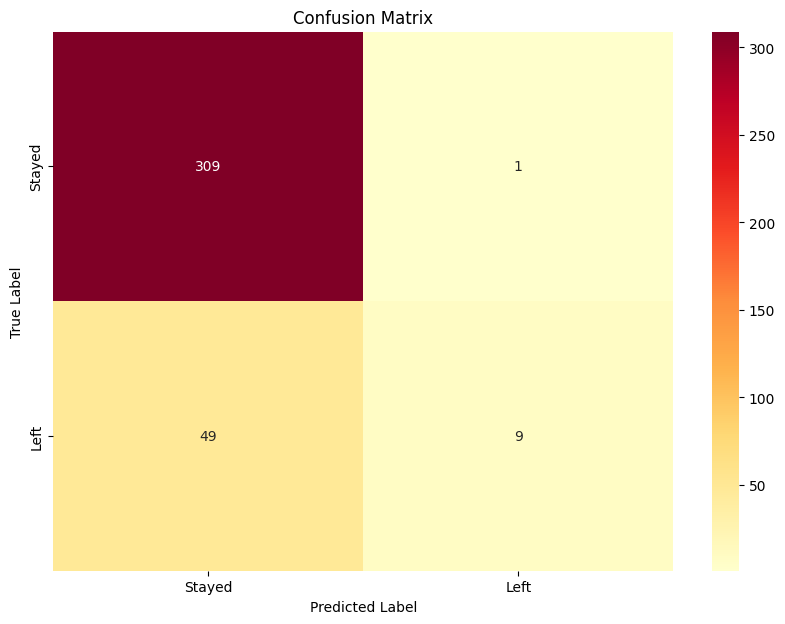

In [27]:

plt.figure(figsize=(10, 7)) 
class_labels=['Stayed','Left']
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [1]:
import gradio as gr
import numpy as np

# Dummy model placeholder
# Replace with your real model (e.g., using joblib or pickle)
# import joblib
# forest = joblib.load("your_model.pkl")

# Dummy model logic for demonstration
class DummyModel:
    def predict(self, X):
        return [1 if X[0][0] == 2 else 0]  # pretend to use BusinessTravel for demo

forest = DummyModel()

# Categorical mappings
business_travel_map = {"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently": 2}
department_map = {"Sales": 0, "Human Resources": 1, "Research & Development": 2}
education_field_map = {
    "Life Sciences": 0, "Medical": 1, "Marketing": 2,
    "Technical Degree": 3, "Human Resources": 4, "Other": 5
}
gender_map = {"Male": 0, "Female": 1}
job_role_map = {
    "Sales Executive": 0, "Research Scientist": 1, "Laboratory Technician": 2,
    "Manufacturing Director": 3, "Healthcare Representative": 4,
    "Manager": 5, "Sales Representative": 6,
    "Research Director": 7, "Human Resources": 8
}
marital_status_map = {"Single": 0, "Married": 1, "Divorced": 2}
overtime_map = {"Yes": 1, "No": 0}

def attrition(BusinessTravel, DailyRate, Department, DistanceFromHome, Education,
              EducationField, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement,
              JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate,
              NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating,
              RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear,
              WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion,
              YearsWithCurrManager, Age):

    input_data = [
        business_travel_map[BusinessTravel],
        DailyRate,
        department_map[Department],
        DistanceFromHome,
        Education,
        education_field_map[EducationField],
        EnvironmentSatisfaction,
        gender_map[Gender],
        HourlyRate,
        JobInvolvement,
        JobLevel,
        job_role_map[JobRole],
        JobSatisfaction,
        marital_status_map[MaritalStatus],
        MonthlyIncome,
        MonthlyRate,
        NumCompaniesWorked,
        overtime_map[OverTime],
        PercentSalaryHike,
        PerformanceRating,
        RelationshipSatisfaction,
        StockOptionLevel,
        TotalWorkingYears,
        TrainingTimesLastYear,
        WorkLifeBalance,
        YearsAtCompany,
        YearsInCurrentRole,
        YearsSinceLastPromotion,
        YearsWithCurrManager,
        Age
    ]

    input_array = np.asarray(input_data).reshape(1, -1)
    prediction = forest.predict(input_array)

    return "✅ Employee is likely to **stay**." if prediction[0] == 0 else "⚠️ Employee is likely to **leave**."

# Gradio UI setup
with gr.Blocks(title="Employee Attrition Predictor") as iface:
    gr.Markdown("## 💼 Employee Attrition Prediction System\nEnter employee details below:")

    with gr.Tab("👤 Basic Info"):
        BusinessTravel = gr.Dropdown(choices=list(business_travel_map.keys()), label="Business Travel", value="Travel_Rarely")
        Department = gr.Dropdown(choices=list(department_map.keys()), label="Department", value="Research & Development")
        Education = gr.Number(label="Education Level (1-5)", value=3, minimum=1, maximum=5)
        EducationField = gr.Dropdown(choices=list(education_field_map.keys()), label="Education Field", value="Life Sciences")
        Gender = gr.Dropdown(choices=list(gender_map.keys()), label="Gender", value="Male")
        Age = gr.Number(label="Age", value=36, minimum=18, maximum=65)

    with gr.Tab("🏢 Job Details"):
        JobRole = gr.Dropdown(choices=list(job_role_map.keys()), label="Job Role", value="Sales Executive")
        JobLevel = gr.Number(label="Job Level", value=2, minimum=1, maximum=5)
        MonthlyIncome = gr.Number(label="Monthly Income", value=6500, minimum=1000, maximum=20000)
        MonthlyRate = gr.Number(label="Monthly Rate", value=14000, minimum=1000, maximum=20000)
        HourlyRate = gr.Number(label="Hourly Rate", value=65, minimum=10, maximum=100)
        OverTime = gr.Dropdown(choices=list(overtime_map.keys()), label="OverTime", value="No")

    with gr.Tab("📊 Satisfaction & Work History"):
        DailyRate = gr.Number(label="Daily Rate", value=800, minimum=200, maximum=1500)
        DistanceFromHome = gr.Number(label="Distance From Home (km)", value=10, minimum=1, maximum=50)
        EnvironmentSatisfaction = gr.Number(label="Environment Satisfaction (1-4)", value=3, minimum=1, maximum=4)
        JobInvolvement = gr.Number(label="Job Involvement (1-4)", value=3, minimum=1, maximum=4)
        JobSatisfaction = gr.Number(label="Job Satisfaction (1-4)", value=3, minimum=1, maximum=4)
        MaritalStatus = gr.Dropdown(choices=list(marital_status_map.keys()), label="Marital Status", value="Single")
        NumCompaniesWorked = gr.Number(label="Number of Companies Worked", value=3, minimum=0, maximum=10)
        PercentSalaryHike = gr.Number(label="Percent Salary Hike", value=15, minimum=0, maximum=50)
        PerformanceRating = gr.Number(label="Performance Rating (1-4)", value=3, minimum=1, maximum=4)
        RelationshipSatisfaction = gr.Number(label="Relationship Satisfaction (1-4)", value=3, minimum=1, maximum=4)
        StockOptionLevel = gr.Number(label="Stock Option Level", value=1, minimum=0, maximum=3)
        TotalWorkingYears = gr.Number(label="Total Working Years", value=10, minimum=0, maximum=40)
        TrainingTimesLastYear = gr.Number(label="Training Times Last Year", value=3, minimum=0, maximum=10)
        WorkLifeBalance = gr.Number(label="Work Life Balance (1-4)", value=3, minimum=1, maximum=4)
        YearsAtCompany = gr.Number(label="Years at Company", value=7, minimum=0, maximum=40)
        YearsInCurrentRole = gr.Number(label="Years in Current Role", value=4, minimum=0, maximum=20)
        YearsSinceLastPromotion = gr.Number(label="Years Since Last Promotion", value=2, minimum=0, maximum=15)
        YearsWithCurrManager = gr.Number(label="Years With Current Manager", value=4, minimum=0, maximum=15)

    submit_btn = gr.Button("🔍 Predict Attrition")
    output = gr.Markdown()

    submit_btn.click(fn=attrition, inputs=[
        BusinessTravel, DailyRate, Department, DistanceFromHome, Education,
        EducationField, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement,
        JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate,
        NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating,
        RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear,
        WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion,
        YearsWithCurrManager, Age
    ], outputs=output)

iface.launch(share=True)


Running on local URL:  http://127.0.0.1:7865


C:\Users\OWAIS KHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\analytics.py:106: UserWarning: IMPORTANT: You are using gradio version 4.37.2, however version 4.44.1 is available, please upgrade. 
--------
  warnings.warn(


Running on public URL: https://38a975cfe233e0ebe0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
